In [1]:
def analyze_lines(itp_file, target_string):
    unique_numbers = []
    number_counts = {}

    with open(itp_file, 'r') as itp:
        lines = itp.readlines()
        matching_lines = [line for line in lines if target_string in line]

        for line in matching_lines:
            parts = line.split()
            number1 = int(parts[0])
            number2 = int(parts[1])
            unique_numbers.extend([number1, number2])
            if number1 in number_counts:
                number_counts[number1] += 1
            else:
                number_counts[number1] = 1

            if number2 in number_counts:
                number_counts[number2] += 1
            else:
                number_counts[number2] = 1

    unique_numbers = list(set(unique_numbers))
    average_count = sum(number_counts.values()) / len(number_counts)

    return unique_numbers, number_counts, average_count

In [2]:
itpst_A = "./data/Nucleic_A_STIFF.itp"
pdbst_A = "./data/ch_A_CG_STIFF.pdb"

itpso_A = "./data/Nucleic_A_SOFT.itp"
pdbso_A = "./data/ch_A_CG_SOFT.pdb"

itptw_A = "./data/Nucleic_A_SOFT2.itp"
pdbtw_A = "./data/ch_A_CG_SOFT2.pdb"

itplp_A = "./data/Nucleic_A_LIMP.itp"
pdblp_A = "./data/ch_A_CG_LIMP.pdb"


itpst_a = "./data/Nucleic_a_STIFF.itp"
pdbst_a = "./data/ch_aS_CG_STIFF.pdb"

itpso_a = "./data/Nucleic_a_SOFT.itp"
pdbso_a = "./data/ch_aS_CG_SOFT.pdb"

itptw_a = "./data/Nucleic_a_SOFT2.itp"
pdbtw_a = "./data/ch_aS_CG_SOFT2.pdb"

itplp_a = "./data/Nucleic_a_LIMP.itp"
pdblp_a = "./data/ch_aS_CG_LIMP.pdb"


itpst_B = "./data/Nucleic_B_STIFF.itp"
pdbst_B = "./data/ch_B_CG_STIFF.pdb"

itpso_B = "./data/Nucleic_B_SOFT.itp"
pdbso_B = "./data/ch_B_CG_SOFT.pdb"

itptw_B = "./data/Nucleic_B_SOFT2.itp"
pdbtw_B = "./data/ch_B_CG_SOFT2.pdb"

itplp_B = "./data/Nucleic_B_LIMP.itp"
pdblp_B = "./data/ch_B_CG_LIMP.pdb"

In [3]:
unique_numbers_st, number_counts_st_A, average_count_st_A = analyze_lines(itpst_A, 'RUBBER_FC*1.000000')
unique_numbers_so, number_counts_so_A, average_count_so_A = analyze_lines(itpso_A, 'RUBBER_FC*1.000000')
unique_numbers_tw, number_counts_tw_A, average_count_tw_A = analyze_lines(itptw_A, 'RUBBER_FC*1.000000')
unique_numbers_lp, number_counts_lp_A, average_count_lp_A = analyze_lines(itplp_A, 'RUBBER_FC*1.000000')

unique_numbers_st, number_counts_st_a, average_count_st_a = analyze_lines(itpst_a, 'RUBBER_FC*1.000000')
unique_numbers_so, number_counts_so_a, average_count_so_a = analyze_lines(itpso_a, 'RUBBER_FC*1.000000')
unique_numbers_tw, number_counts_tw_a, average_count_tw_a = analyze_lines(itptw_a, 'RUBBER_FC*1.000000')
unique_numbers_lp, number_counts_lp_a, average_count_lp_a = analyze_lines(itplp_a, 'RUBBER_FC*1.000000')

unique_numbers_st, number_counts_st_B, average_count_st_B = analyze_lines(itpst_B, 'RUBBER_FC*1.000000')
unique_numbers_so, number_counts_so_B, average_count_so_B = analyze_lines(itpso_B, 'RUBBER_FC*1.000000')
unique_numbers_tw, number_counts_tw_B, average_count_tw_B = analyze_lines(itptw_B, 'RUBBER_FC*1.000000')
unique_numbers_lp, number_counts_lp_B, average_count_lp_B = analyze_lines(itplp_B, 'RUBBER_FC*1.000000')

In [4]:
av_st = (average_count_st_A * len(number_counts_st_A) + average_count_st_a*len(number_counts_st_a) + average_count_st_B*len(number_counts_st_B))/(len(number_counts_st_A) + len(number_counts_st_a) + len(number_counts_st_B))
av_so = (average_count_so_A * len(number_counts_so_A) + average_count_so_a*len(number_counts_so_a) + average_count_so_B*len(number_counts_so_B))/(len(number_counts_so_A) + len(number_counts_so_a) + len(number_counts_so_B))

In [5]:
av_tw = (average_count_tw_A * len(number_counts_tw_A) + average_count_tw_a*len(number_counts_tw_a) + average_count_tw_B*len(number_counts_tw_B))/(len(number_counts_tw_A) + len(number_counts_tw_a) + len(number_counts_tw_B))

In [6]:
av_lp = (average_count_lp_A * len(number_counts_lp_A) + average_count_lp_a*len(number_counts_lp_a) + average_count_lp_B*len(number_counts_lp_B))/(len(number_counts_lp_A) + len(number_counts_lp_a) + len(number_counts_lp_B))

In [7]:
singlecolor = '#4477AA'

In [8]:
counts = [av_st,av_so,av_tw,av_lp]

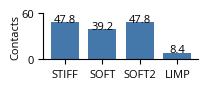

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Open Sans'
NETS = ['STIFF','SOFT','SOFT2','LIMP']
fig, ax = plt.subplots(figsize=(2.0, 0.6))
width=0.75
bar_colors = [singlecolor,singlecolor,singlecolor,singlecolor]
fsp=20
bars0 = ax.bar(NETS, counts, label = NETS, color = singlecolor, width=0.75)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for bar in bars0:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.6,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color="black",
      weight='normal',
      fontsize=8
  )
ax.set_xticks(NETS, labels=NETS, size=8)

ax.set_ylabel("Contacts", fontsize=8, fontweight='normal', labelpad=0)
ax.set_ylim(0,60)
ax.set_yticks([0,60], labels=[0,60], size=8)
plt.show()

In [17]:
import MDAnalysis as mda
u_st1 = mda.Universe('./data/md.1.stiff.final.pdb')
u_st2 = mda.Universe('./data/md.2.stiff.final.pdb')
u_st3 = mda.Universe('./data/md.3.stiff.final.pdb')
u_st4 = mda.Universe('./data/md.4.stiff.final.pdb')

/home/cikhartj/anaconda3/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "


In [ ]:
u_so1 = mda.Universe('./data/md.1.soft.final.pdb')
u_so2 = mda.Universe('./data/md.2.soft.final.pdb')
u_so3 = mda.Universe('./data/md.3.soft.final.pdb')
u_so4 = mda.Universe('./data/md.4.soft.final.pdb')

In [11]:
u_tw1 = mda.Universe('./data/md.1.soft2.final.pdb')
u_tw2 = mda.Universe('./data/md.2.soft2.final.pdb')
u_tw3 = mda.Universe('./data/md.3.soft2.final.pdb')
u_tw4 = mda.Universe('./data/md.4.soft2.final.pdb')

In [12]:
u_lp1 = mda.Universe('./data/md.1.limp.final.pdb')
u_lp2 = mda.Universe('./data/md.2.limp.final.pdb')
u_lp3 = mda.Universe('./data/md.3.limp.final.pdb')
u_lp4 = mda.Universe('./data/md.4.limp.final.pdb')

In [13]:
u_aa1 = mda.Universe('./data/prod.1.pdb')
u_aa2 = mda.Universe('./data/prod.2.pdb')
u_aa3 = mda.Universe('./data/prod.3.pdb')
u_aa4 = mda.Universe('./data/prod.4.pdb')

/home/cikhartj/anaconda3/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:346: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn(wmsg)


In [14]:
waters_test_aa1_ff = u_aa1.select_atoms(
    'name OW and around 8.0 (element C or element N or element P or element O or element S and (not (name OW or name HW1 or name HW2)))'
)

waters_test_aa2_ff = u_aa2.select_atoms(
    'name OW and around 8.0 (element C or element N or element P or element O or element S and (not (name OW or name HW1 or name HW2)))'
)

waters_test_aa3_ff = u_aa3.select_atoms(
    'name OW and around 8.0 (element C or element N or element P or element O or element S and (not (name OW or name HW1 or name HW2)))'
)

waters_test_aa4_ff = u_aa4.select_atoms(
    'name OW and around 8.0 (element C or element N or element P or element O or element S and (not (name OW or name HW1 or name HW2)))'
)

In [15]:
water_count_aa1_ff = len(waters_test_aa1_ff)
water_count_aa2_ff = len(waters_test_aa2_ff)
water_count_aa3_ff = len(waters_test_aa3_ff)
water_count_aa4_ff = len(waters_test_aa4_ff)

In [18]:
water_count_st1 = len(u_st1.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))
water_count_st2 = len(u_st2.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))
water_count_st3 = len(u_st3.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))
water_count_st4 = len(u_st4.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))

In [19]:
water_count_so1 = len(u_so1.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))
water_count_so2 = len(u_so2.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))
water_count_so3 = len(u_so3.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))
water_count_so4 = len(u_so4.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))

In [20]:
water_count_tw1 = len(u_tw1.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))
water_count_tw2 = len(u_tw2.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))
water_count_tw3 = len(u_tw3.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))
water_count_tw4 = len(u_tw4.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))

In [21]:
water_count_lp1 = len(u_lp1.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))
water_count_lp2 = len(u_lp2.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))
water_count_lp3 = len(u_lp3.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))
water_count_lp4 = len(u_lp4.select_atoms('name W and around 8.0 (name BB or name BB1 or name BB2 or name BB3 or name SC1 or name SC2 or name SC3 or name SC4)'))

In [28]:
import numpy as np
def compute_mean_variance(numbers):
    mean = np.mean(numbers)

    variance = np.std(numbers)
    return mean, variance

In [29]:
waters_stiff = compute_mean_variance ([water_count_st1*4, water_count_st2*4, water_count_st3*4, water_count_st4*4])

In [30]:
waters_soft = compute_mean_variance ([water_count_so1*4, water_count_so2*4, water_count_so3*4, water_count_so4*4])

In [31]:
waters_soft2 = compute_mean_variance ([water_count_tw1*4, water_count_tw2*4, water_count_tw3*4, water_count_tw4*4])

In [32]:
waters_limp = compute_mean_variance ([water_count_lp1*4, water_count_lp2*4, water_count_lp3*4, water_count_lp4*4])

In [33]:
waters_aa = compute_mean_variance([114234, 113623, 113730 ,114455])

In [34]:
values = [waters_stiff[0], waters_soft[0], waters_soft2[0],waters_limp[0],waters_aa[0]]

In [35]:
socolor1 = '#228833'
socolor2 = '#228833'
socolor3 = '#228833'
socolor4 = '#228833'
colorssoft = [socolor1, socolor2, socolor3, socolor4]

twcolor1 = '#66CCEE'
twcolor2 = '#66CCEE'
twcolor3 = '#66CCEE'
twcolor4 = '#66CCEE'
colorssoft2 = [twcolor1, twcolor2, twcolor3, twcolor4]

lpcolor1 = '#EE6677'
lpcolor2 = '#EE6677'
lpcolor3 = '#EE6677'
lpcolor4 = '#EE6677'
colorslimp = [lpcolor1, lpcolor2, lpcolor3, lpcolor4]

stcolor1 = '#AA3377'
stcolor2 = '#AA3377'
stcolor3 = '#AA3377'
stcolor4 = '#AA3377'
colorsstiff = [stcolor1, stcolor2, stcolor3, stcolor4]

aacolor1 = '#CCBB44'
aacolor2 = '#CCBB44'
aacolor3 = '#CCBB44'
aacolor4 = '#CCBB44'
colorsaa = [aacolor1, aacolor2, aacolor3, aacolor4]

In [36]:
singlecolor = '#4477AA'

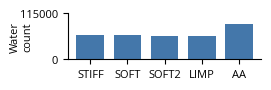

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (2.5,0.6))
NETS = ['STIFF', 'SOFT', 'SOFT2', 'LIMP', 'AA']
plt.rcParams["font.weight"] = "normal"
plt.rcParams['font.family'] = 'Open Sans'
bar_colors = [stcolor1,socolor4,twcolor3,lpcolor2,aacolor3]
bars=ax.bar(NETS, values, align='center', ecolor='black', capsize=8, color = singlecolor, width=0.75)
ax.set_ylabel('Water' + '\n' + 'count', fontweight='normal', fontsize=8, labelpad=-10)
ax.yaxis.grid(False)
ax.set_yticks([0,150000])
ax.set_yticklabels([0,115000], size=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(NETS, labels=NETS, size=8)
plt.show()